<center><h1>Inteligencia Artificial</header1></center>

Presentado por: Mercy Arrobo  <br>
Fecha: 27/07/2022

# Importación de librerias necesarias

In [12]:
#Para esta actividad se importarán las siguientes librerías:
import pandas as pd
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.tree import export_graphviz
from six import StringIO 
from IPython.display import Image  
import pydotplus

## Cargar el Dataset

In [6]:
#Código para cargar el Dataset
pima = pd.read_csv("data.csv")
pima.head()

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,1,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,...,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469
1,1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,...,0.795297,0.008323,0.623652,0.610237,0.839969,0.283846,0.264577,0.570175,1,0.020794
2,1,0.426071,0.499019,0.472295,0.601450,0.601364,0.998857,0.796403,0.808388,0.302035,...,0.774670,0.040003,0.623841,0.601449,0.836774,0.290189,0.026555,0.563706,1,0.016474
3,1,0.399844,0.451265,0.457733,0.583541,0.583541,0.998700,0.796967,0.808966,0.303350,...,0.739555,0.003252,0.622929,0.583538,0.834697,0.281721,0.026697,0.564663,1,0.023982
4,1,0.465022,0.538432,0.522298,0.598783,0.598783,0.998973,0.797366,0.809304,0.303475,...,0.795016,0.003878,0.623521,0.598782,0.839973,0.278514,0.024752,0.575617,1,0.035490


In [8]:
pima.count()

Bankrupt?                                                   6819
 ROA(C) before interest and depreciation before interest    6819
 ROA(A) before interest and % after tax                     6819
 ROA(B) before interest and depreciation after tax          6819
 Operating Gross Margin                                     6819
                                                            ... 
 Liability to Equity                                        6819
 Degree of Financial Leverage (DFL)                         6819
 Interest Coverage Ratio (Interest expense to EBIT)         6819
 Net Income Flag                                            6819
 Equity to Liability                                        6819
Length: 96, dtype: int64

## Descripción de la fuente del Dataset

Está dataset tiene un conjunto de datos de la predición de bancarrota de la empresa . Con la que cuenta con 95 variables, dónde 94 variables son independientes y la variable "Bankrupt" es la variable dependiente. Además contiene datos continuos.

## Explique el problema a resolver. 
Los datos se recogieron del Taiwan Economic Journal para los años 1999 a 2009. La quiebra de la empresa se definió a partir de la normativa empresarial de la Bolsa de Taiwán.
Por lo tanto se usa el modelo de árbol de decisión, la cuál nos da una representación gráfica de todos los sucesos para proceder a la toma de decisión.

## Caracterización del Dataset

Realice una descripción de los datos con:

>- Número de instancias en total.

          Existen 6819 datos en  nuestro dataset
          
>- Número de atributos de entrada, su significado y tipo.
        
Y - ¿Quiebra?: Etiqueta de clase 

X1 - ROA(C) antes de intereses y depreciación antes de intereses: Rendimiento 
sobre los activos totales(C)

X2 - ROA(A) antes de intereses y % después de impuestos: Rendimiento sobre los activos totales(A)

X3 - ROA(B) antes de intereses y depreciación después de impuestos: Rendimiento sobre los activos totales (B)

X4 - Margen bruto operativo: Beneficio bruto/Ventas netas

X5 - Ventas realizadas Margen bruto: Beneficio bruto realizado/Ventas netas

X6 - Tasa de beneficio operativo: Ingresos operativos/Ventas netas

X7 - Tipo de interés neto antes de impuestos: Ingresos antes de impuestos/Ventas netas

X8 - Tipo de interés neto después de impuestos: Ingresos netos/Ventas
netas 

X9 - Ingresos no industriales y gastos/ingresos: Ratio de ingresos netos no operativos 

X10 - Tipo
de interés continuo (después de impuestos): Ingresos netos-Excluir ganancia o pérdida de enajenación/ventas
netas 

X11 - Tasa de gastos operativos: Gastos operativos/Ventas
netas 

X12 - Tasa de gastos de investigación y desarrollo: (Gastos de investigación y desarrollo)/Ventas
netas 

X13 - Tasa de flujo de efectivo: Flujo de efectivo de pasivos operativos/corrientes 

X14 - Tasa de interés de deuda que devenga intereses
: Deuda / Capital
que devenga intereses 

X15 - Tasa impositiva (A): Tasa
impositiva efectiva X16 - Valor neto por acción (B): Valor contable por acción (B)

X17 - Valor neto por acción (A): Valor contable por acción(A)

X18 - Valor neto por acción (C): Valor contable por acción (C)

X19 - EPS persistente en las últimas cuatro temporadas: EPS-Ingreso
neto 

X20 - Flujo de caja por acción 

X21 - Ingresos por acción
(Yuan ¥): Ventas por acción

X22 - Beneficio operativo por acción (Yuan ¥): Ingreso operativo por acción

X23 - Por acción Beneficio neto antes de impuestos (Yuan ¥): Ingresos por acción
antes de impuestos 

X24 - Tasa
de crecimiento de la ganancia bruta de las ventas realizadas X25 - Tasa de crecimiento de la ganancia operativa: Crecimiento
de la ganancia operativa X26 - Tasa de crecimiento de la ganancia neta después de impuestos: Crecimiento
de la ganancia neta X27 - Tasa de crecimiento de la ganancia neta regular: Ingreso
operativo continuo crecimiento después de impuestos X28 - Tasa de crecimiento de la ganancia neta continua: Crecimiento
de ganancias o pérdidas de eliminación de ingresos netos excluyendo los ingresos X29 - Tasa de crecimiento total de los activos: Crecimiento total de
activos X30 - Tasa de crecimiento del valor neto: Crecimiento
total del capital X31 - Índice de crecimiento del rendimiento total de los activos: Rendimiento sobre el crecimiento total de
los activos X32 - Reinversión en efectivo %: Ratio de reinversión en
efectivo X33 - Ratio
actual X34 - Ratio rápido: Prueba
de fuego X35 - Ratio de gastos por intereses: Gastos por intereses/Ingresos totales
X36 - Deuda total/Patrimonio neto total: Ratio
total de pasivo/capital X37 - Ratio de endeudamiento %: Pasivo/Activos totales
X38 - Patrimonio neto/Activos: Patrimonio neto/Activos
totales X39 - Ratio de idoneidad de fondos a largo plazo (A): (Pasivo a largo plazo+Patrimonio neto)/Activos fijos
X40 - Dependencia del préstamo: Coste de la deuda
que devenga intereses X41 - Pasivo contingente/Patrimonio neto: Pasivo contingente/Patrimonio neto
X42 - Beneficio operativo/capital desembolsado: Ingresos de explotación/Capital
X43 - Beneficio neto antes de impuestos/Capital desembolsado: Ingresos antes de impuestos/Capital
X44 - Inventario y cuentas por cobrar/Valor neto: (Inventario+Cuentas por cobrar)/Patrimonio
X45 - Volumen de negocios total de activos X46 - Volumen de negocios
de cuentas por cobrar
X47 - Promedio de días de cobro: Días por cobrar pendientes
X48 - Tasa de rotación de inventario (veces)
X49 - Frecuencia
de rotación de activos fijos X50 - Tasa de rotación del patrimonio neto (veces): Rotación
de capital X51 - Ingresos por persona: Ventas por empleado
X52 - Beneficio operativo por persona: Ingresos de operación por empleado
X53 - Tasa de asignación por persona: Activos fijos por empleado
X54 - Capital de trabajo a activos totales
X55 - Activos rápidos / Activos totales
X56 - Activos corrientes / Activos totales
X57 - Efectivo / Activos totales
X58 - Activos rápidos / Pasivo
X59 - Efectivo/Pasivo
Corriente X60 - Pasivo Corriente a Activos
X61 - Fondos Operativos a Pasivo
X62 - Inventario/Capital
de Trabajo X63 - Inventario/Pasivo
Corriente X64 - Pasivo Corriente/Pasivo
X65 - Capital de Trabajo/Capital Social
X66 - Pasivos Corrientes/Patrimonio Neto
X67 - Pasivo a Largo Plazo a Activos Corrientes
X68 - Ganancias Retenidas a Activos
Totales X69 - Ingresos totales/Gastos totales
X70 - Gastos totales/Activos
X71 - Tasa de rotación de activos corrientes: Activos corrientes a ventas
X72 - Tasa de rotación rápida de activos: Activos rápidos a ventas
X73 - Tasa de rotación capitcal de trabajo: Capital de trabajo a ventas
X74 - Tasa de rotación de efectivo: Efectivo a ventas
X75 - Flujo de efectivo a ventas
X76 - Activos fijos a activos
X77 - Pasivo corriente a pasivo
X78 - Pasivo corriente a capital
X79 - Capital a pasivo
a largo plazo X80 - Flujo de efectivo a activos totales
X81 - Flujo de efectivo a pasivo
X82 - CFO a activos
X83 - Flujo de efectivo a capital
X84 - Pasivo corriente a activos corrientes
X85 - Pasivo-Activos Bandera: 1 si el pasivo total excede los activos totales, 0 de lo contrario
X86 - Ingreso neto a activos totales
X87 - Activos totales al precio
de GNP X88 - Intervalo
sin crédito X89 - Beneficio bruto a ventas
X90 - Ingreso neto al patrimonio
de los accionistas X91 - Pasivo sobre el capital
X92 - Grado de apalancamiento financiero (DFL)
X93 - Relación de cobertura de intereses (gastos por intereses a EBIT)
X94 - Indicador de ingresos netos: 1 si el ingreso neto es negativo durante los últimos dos años, 0 de lo contrario
X95 - Capital a responsabilidad
           
>- Estadísticas de la variable objetivo.
>- Estadísticas los atributos en relación con la variable objetivo.


In [9]:
#Código que responde a la descripción anterior
pima.describe()

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
count,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,...,6819.000000,6.819000e+03,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.0,6819.000000
mean,0.032263,0.505180,0.558625,0.553589,0.607948,0.607929,0.998755,0.797190,0.809084,0.303623,...,0.807760,1.862942e+07,0.623915,0.607946,0.840402,0.280365,0.027541,0.565358,1.0,0.047578
std,0.176710,0.060686,0.065620,0.061595,0.016934,0.016916,0.013010,0.012869,0.013601,0.011163,...,0.040332,3.764501e+08,0.012290,0.016934,0.014523,0.014463,0.015668,0.013214,0.0,0.050014
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.000000
25%,0.000000,0.476527,0.535543,0.527277,0.600445,0.600434,0.998969,0.797386,0.809312,0.303466,...,0.796750,9.036205e-04,0.623636,0.600443,0.840115,0.276944,0.026791,0.565158,1.0,0.024477
50%,0.000000,0.502706,0.559802,0.552278,0.605997,0.605976,0.999022,0.797464,0.809375,0.303525,...,0.810619,2.085213e-03,0.623879,0.605998,0.841179,0.278778,0.026808,0.565252,1.0,0.033798
75%,0.000000,0.535563,0.589157,0.584105,0.613914,0.613842,0.999095,0.797579,0.809469,0.303585,...,0.826455,5.269777e-03,0.624168,0.613913,0.842357,0.281449,0.026913,0.565725,1.0,0.052838
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,9.820000e+09,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,1.000000


In [10]:
pima.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6819 entries, 0 to 6818
Data columns (total 96 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   Bankrupt?                                                 6819 non-null   int64  
 1    ROA(C) before interest and depreciation before interest  6819 non-null   float64
 2    ROA(A) before interest and % after tax                   6819 non-null   float64
 3    ROA(B) before interest and depreciation after tax        6819 non-null   float64
 4    Operating Gross Margin                                   6819 non-null   float64
 5    Realized Sales Gross Margin                              6819 non-null   float64
 6    Operating Profit Rate                                    6819 non-null   float64
 7    Pre-tax net Interest Rate                                6819 non-null   float64
 8    After-tax net Int

<AxesSubplot:xlabel='Bankrupt?', ylabel='Count'>

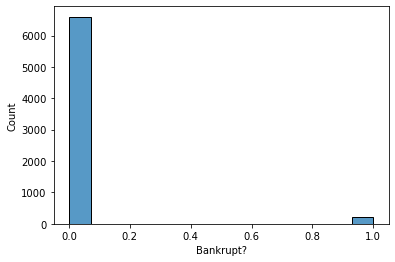

In [14]:
#Estadististica de la variable objetivo
sns.histplot(pima['Bankrupt?'])

In [17]:
#Estadísticas los atributos en relación con la variable objetivo.
# Variable objetivo y variables de entrada
feature_cols = ['ROA(C) before interest and depreciation before interest', 'ROA(A) before interest and % after tax', 'ROA(B) before interest and depreciation after tax', 'Operating Gross Margin', 'Realized Sales Gross Margin']
# Todas las caracteriticas
X = pima[feature_cols]
Outcome = ['Bankrupt?']
# Variable objetivo
y = pima[Outcome]

KeyError: "None of [Index(['ROA(C) before interest and depreciation before interest',\n       'ROA(A) before interest and % after tax',\n       'ROA(B) before interest and depreciation after tax',\n       'Operating Gross Margin', 'Realized Sales Gross Margin'],\n      dtype='object')] are in the [columns]"

## Preprocesamiento del dataset. Transformaciones previas necesarias para la modelación

In [15]:
#Transformación de las caracteristicas (mire el apartado Feature engineering del aula virtual)
### Estandarización de la data ###
from sklearn.preprocessing import StandardScaler
VariablesEntradaScaler=StandardScaler()
VariableObjetivoScaler=StandardScaler()

In [16]:
#Almacenamiento del objeto de ajuste para referencia posterior
VariablesEntradaFit=VariablesEntradaScaler.fit(X)
VariableObjetivoFit=VariableObjetivoScaler.fit(y)

NameError: name 'X' is not defined

## División del dataset en datos de entrenamiento y datos de test 

In [5]:
#Código que realice la división en entrenamiento y test, de acuerdo con la estretgia de evaluación planeada. Describa cuál es.


## Modelamiento

In [6]:
#Códo del modelo

In [7]:
#Entrenamiento

In [8]:
#Test

## Evaluación del Modelo

Construya un o dos párrafos con los principales hallazgos. Cómo está funcionando el modelo? Calidad en los resultados de predicción. 